<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/mark_table_in_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralyticsplus==0.0.23 ultralytics==8.0.21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolv

In [5]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
image = 'snippet.JPG'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()

Ultralytics YOLOv8.0.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /content/snippet.JPG: 640x256 2 borderlesss, 837.6ms
Speed: 4.3ms pre-process, 837.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


tensor([[3.00000e+01, 4.05000e+02, 2.88000e+02, 5.40000e+02, 5.71694e-01, 1.00000e+00],
        [3.40000e+01, 6.43000e+02, 3.02000e+02, 7.62000e+02, 5.34770e-01, 1.00000e+00]])


In [6]:
render.save("test.jpg")

In [7]:
!pip install ultralytics opencv-python

Ultralytics YOLOv8.0.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs
0: 640x256 2179.8ms
Speed: 0.9ms pre-process, 2179.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


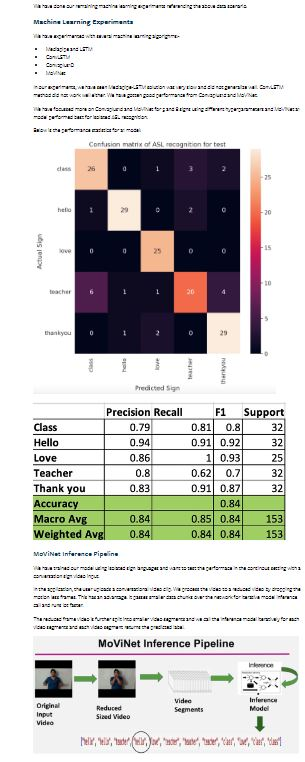

In [10]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model (assuming the model is trained for table detection)
model = YOLO('yolov8x.pt')  # Replace with the path to your custom-trained model if needed

# Read the image
image_path = 'snippet.JPG'
image = cv2.imread(image_path)

# Perform table detection
results = model(image)

# Process the results
for result in results:
    boxes = result.boxes.xyxy.numpy()  # Extract bounding boxes
    scores = result.boxes.conf.numpy()  # Extract confidence scores

    # Draw bounding boxes around detected tables
    for box, score in zip(boxes, scores):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'{score:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save or display the output image
output_image_path = 'output_image.jpg'
cv2.imwrite(output_image_path, image)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
